<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-Test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of Train/Test Validation Methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training/test validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston Housing Data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the testing data.
* Rank the models by how well they score on the testing data set.

**Then try k-fold cross-validation:**
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different k-splits of the data for the same models.

If you're interested, try a variety of response variables. We start with **MEDV** (the `.target` attribute from the data set load method).

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

### 1) Clean up any data problems.

Fix any problems with the data, if applicable.

In [3]:
X['MEDV']=y

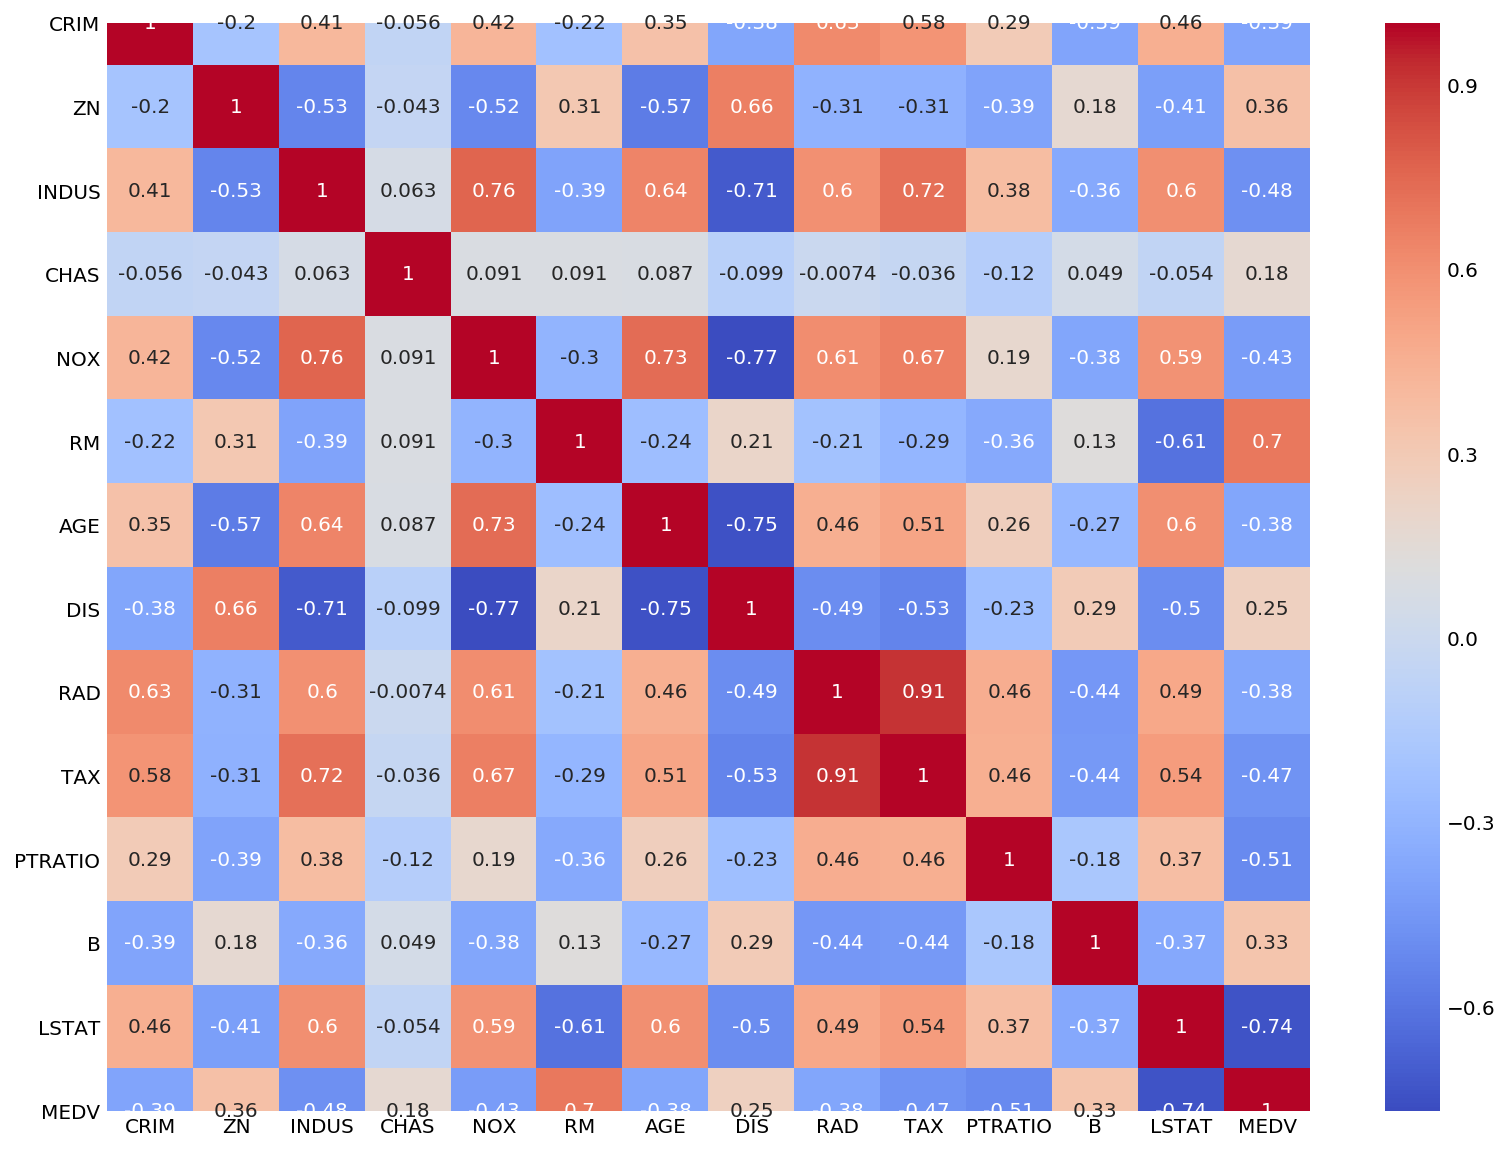

In [4]:
plt.figure(figsize=(12,10))
sns.heatmap(X.corr(), cmap='coolwarm',annot=True);

### 2) Select 3–4 variables with your data set on which to perform a 50-50 train/test split.

- Use scikit-learn.
- Score and plot your predictions.

In [5]:
# A:
X1 = X[['INDUS','RM','PTRATIO','LSTAT']]
y1 = X[['MEDV']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.5, random_state = 42)
lr = LinearRegression()
lr.fit(X1_train,y1_train)
lr.score(X1_train,y1_train)

0.7046019710492835

In [6]:
lr.predict(X1_test)

array([[26.48512568],
       [30.74969225],
       [16.99323491],
       [24.86002257],
       [18.4592926 ],
       [22.61752294],
       [17.06976714],
       [13.00420835],
       [20.76016618],
       [19.31589659],
       [19.50290916],
       [21.01929953],
       [-2.34813791],
       [22.15823411],
       [18.78391089],
       [25.27375143],
       [17.54799499],
       [ 3.29342554],
       [39.26810976],
       [17.37785677],
       [25.43340937],
       [27.1589903 ],
       [11.07109632],
       [23.47689017],
       [17.93539527],
       [13.54999493],
       [22.29993739],
       [19.76718336],
       [17.79599881],
       [18.27930029],
       [18.83486724],
       [25.13193319],
       [25.88323564],
       [17.99900493],
       [14.54350352],
       [21.38395085],
       [32.45802987],
       [20.10888827],
       [19.88858244],
       [24.55387376],
       [12.01235322],
       [27.866136  ],
       [39.9724532 ],
       [17.95534376],
       [25.52070865],
       [15

### 3) Try 70-30 and 90-10.

- Score and plot.  
- How do your metrics change?

In [7]:
# A:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 42)
lr = LinearRegression()
lr.fit(X1_train,y1_train)
lr.score(X1_train,y1_train)

0.6857397450682992

In [8]:
lr.predict(X1_test)

array([[26.71323863],
       [30.93986346],
       [17.0694121 ],
       [25.36331247],
       [18.448045  ],
       [22.79473745],
       [17.28224948],
       [12.84278058],
       [20.91582214],
       [19.58996238],
       [19.66428676],
       [21.20558106],
       [-1.94100464],
       [22.35092996],
       [19.33095915],
       [25.04435819],
       [17.70274148],
       [ 3.68465773],
       [38.86354728],
       [17.40413629],
       [25.82826459],
       [27.3965273 ],
       [11.30339292],
       [23.56984388],
       [18.13304505],
       [14.00037864],
       [22.7879405 ],
       [19.47246009],
       [18.01075356],
       [18.69055491],
       [19.37009701],
       [25.40991027],
       [25.41528087],
       [18.71855573],
       [14.57828063],
       [21.69185426],
       [32.39167845],
       [20.64192452],
       [20.12152879],
       [24.89723823],
       [12.44367397],
       [27.92272775],
       [39.469102  ],
       [18.52986897],
       [25.76875727],
       [15

In [9]:
# A:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.1, random_state = 42)
lr = LinearRegression()
lr.fit(X1_train,y1_train)
lr.score(X1_train,y1_train)

0.6723548319015855

In [10]:
y1_test.tail()

,MEDV
33,13.1
70,24.2
470,19.9
0,24.0
11,18.9


In [11]:
# As the test size decreases, the score decrease as well. 

### 4) Try k-folds cross-validation with k between 5–10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What is the variance of scores like?
- Try out different folds to get a sense of how this impacts your score.

In [12]:
# A:
Kf = KFold(n_splits=5, random_state = 42, shuffle = True)
Kf.get_n_splits(X)

5

In [13]:
scores = cross_val_score(lr,X1_train,y1_train,cv=Kf)
print(scores)
print(scores.mean())

[0.59452257 0.69351207 0.66778273 0.72719976 0.58090222]
0.6527838713527728


In [14]:
'''When there are more splits, the score became lower. This means if the number of splits become higher, the score will be lower because the training set has lesser data to train on as the data are all split up,thus giving a lower score'''

'When there are more splits, the score became lower. This means if the number of splits become higher, the score will be lower because the training set has lesser data to train on as the data are all split up,thus giving a lower score'

### 5) [Bonus] Optimize the $R^2$ score.

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or k-folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of k-folds is up to you.

> *Hint:* The `itertools` package is useful for combinations and permutations.

In [15]:
import statsmodels.api as sm
from itertools import permutations

In [17]:
# A:
X2 = X[['INDUS','RM','PTRATIO','LSTAT']]
X2 = sm.add_constant(X2)
y2 = X[['MEDV']]
model = sm.OLS(y2,X2)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     264.5
Date:                Fri, 15 Nov 2019   Prob (F-statistic):          5.41e-122
Time:                        21:34:19   Log-Likelihood:                -1553.0
No. Observations:                 506   AIC:                             3116.
Df Residuals:                     501   BIC:                             3137.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.6150      3.927      4.741      0.000      10.900      26.330
INDUS          0.0076      0.044      0.174      0.862      -0.078       0.093
RM             4.5152      0.426     10.592      0.000       3.678       5.353
PTRATIO       -0.9351      0.120     -7.763      0.000      -1.172      -0.698
LSTAT         -0.5757      0.048    -12.023      0.000      -0.670      -0.482
==============================================================================
Omnibus:                      200.524   Durbin-Watson:                   0.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1003.887
Skew:                           1.689   Prob(JB):                    1.02e-218
Kurtosis:                       9.017   Cond. No.                         452.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
X2 = X[['INDUS','RM','PTRATIO','LSTAT']]
X2 = permutations(X2)
X2 

### 5.1) Explain what could be wrong with this approach.

In [18]:
'''By using the itertools package, although it can show which combination will give the best score, it does not help to eliminate the insignificant variable. '''

'By using the itertools package, although it can show which combination will give the best score, it does not help to eliminate the insignificant variable. '

### 6) [Bonus] Explore another target variable and practice Patsy formulas.

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this data set?

**Try using Patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and Pearson scores.*

In [ ]:
import patsy

# A: